In [62]:
from src.npy2pfm import *
from src.visual import show
import cv2

In [2]:
ls

Sampler/              dataset_scaled.zip    results_ganet/
__pycache__/          frames_cleanpass/     results_mobilestereo/
data/                 metrics.ipynb         src/
dataset/              pfmtest.ipynb         testdataset/
dataset.zip           requrements.txt
dataset_mobile.zip    result/


In [104]:
__imagenet_stats = {'mean': [0.485, 0.456, 0.406],
                    'std': [0.229, 0.224, 0.225]}
def normalize(img):
    """
    De-normalize a tensor and return img
    :param img: normalized image, [C,H,W]
    :return: original image, [H,W,C]
    """
    if len(img.shape)<3:
        img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    else:
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = img/255.0
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]

    img[..., 0] -= mean[0]
    img[..., 1] -= mean[1]
    img[..., 2] -= mean[2]

    img[..., 0] /= std[0]
    img[..., 1] /= std[1]
    img[..., 2] /= std[2]
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    return img

In [94]:
def print_errors(predicted, gt):
    diff = predicted - gt
    # Note: code for computing the metrics can be found in module/loss.py
    valid_mask = predicted > 0.0
    # find 3 px error
    err_px = (abs(diff) > 3).sum()
    total_px = (valid_mask).sum()
    print('3 px error %.3f%%'%(err_px*100.0/total_px))

    # find epe
    err = np.abs(diff[valid_mask]).sum()
    print('EPE %f'%(err * 1.0/ total_px))

In [95]:
ganet_list = os.listdir('results_ganet')
ganet_list

['1004.npy', '1003.npy', '1002.npy', '1000.npy', '1001.npy']

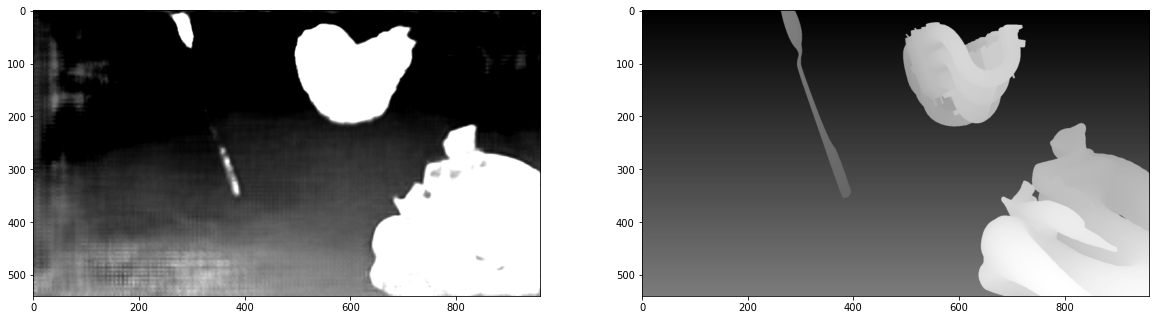

3 px error 0.000%
EPE 2.187696


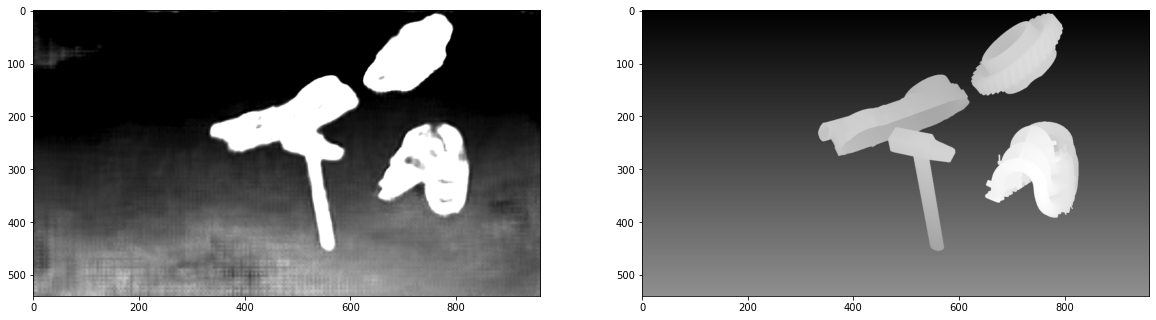

3 px error 0.000%
EPE 2.204175


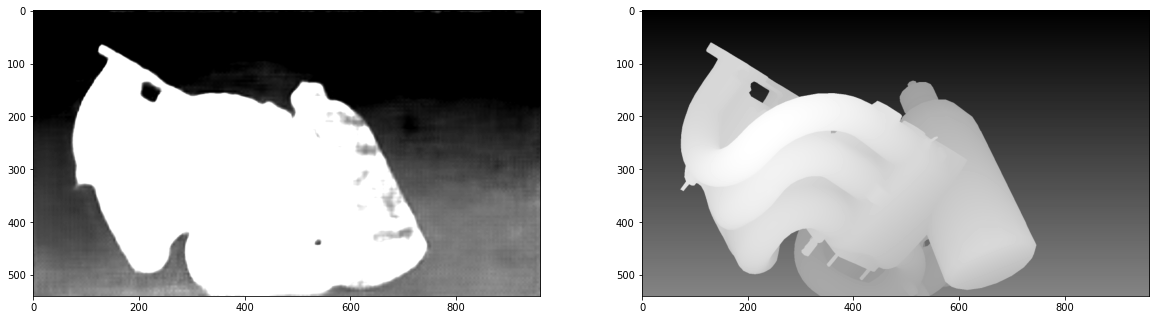

3 px error 0.000%
EPE 2.208646


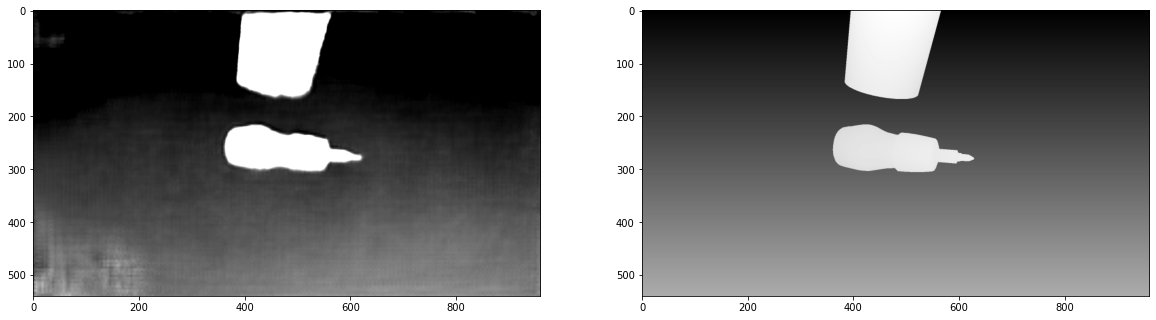

3 px error 0.000%
EPE 2.201716


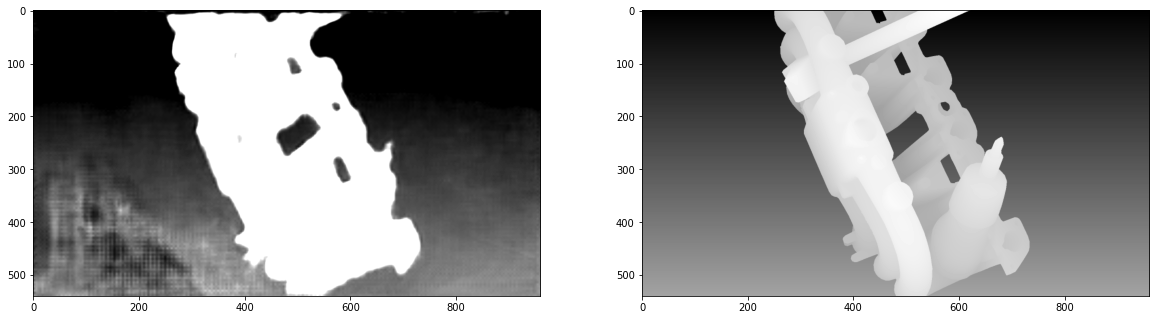

3 px error 0.000%
EPE 2.232533


In [96]:
for name  in ganet_list:
    predicted = np.load(os.path.join('results_ganet',  name))
    gt = read(os.path.join("/Users/s70c3/Projects/SyntheticStereoDataset/dataset/disparity/TEST/flying", name.split('.')[-2]+'.pfm'))
    gt = normalize(gt)
    show(1/predicted, gt)
    print_errors(1/predicted, gt)

In [97]:
mbn_list = os.listdir('results_mobilestereo')
mbn_list

['dataset_frames_finalpass_TEST_flying_left_1005.png',
 'dataset_frames_finalpass_TEST_flying_left_1004.png',
 'dataset_frames_finalpass_TEST_flying_left_1006.png',
 'dataset_frames_finalpass_TEST_flying_left_1007.png',
 'dataset_frames_finalpass_TEST_flying_left_1003.png',
 'dataset_frames_finalpass_TEST_flying_left_1002.png',
 'dataset_frames_finalpass_TEST_flying_left_1000.png',
 'dataset_frames_finalpass_TEST_flying_left_1001.png',
 'dataset_frames_finalpass_TEST_flying_left_1009.png',
 'dataset_frames_finalpass_TEST_flying_left_1008.png']

In [105]:
for name  in mbn_list:
    predicted = cv2.imread(os.path.join('results_mobilestereo',  name))
#     predicted = cv2.cvtColor(predicted,cv2.COLOR_BGR2GRAY)
    pfm_name =  name.split('.')[-2].split('_')[-1]+'.pfm'
    gt = read(os.path.join("/Users/s70c3/Projects/SyntheticStereoDataset/dataset/disparity/TEST/flying",pfm_name))
    gt = gt[27:-1, :]
    gt = normalize(gt)
    predicted = normalize(predicted)
#     print(predicted, gt)
    show(predicted, gt)
    print_errors(predicted, gt)

error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)
